# Hunagund Sharikh Mannusaheb 
# PES2PEG20DS293

In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal     import seasonal_decompose, STL
from matplotlib.pyplot import figure
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from sklearn                              import  metrics
from statsmodels.tsa.vector_ar.vecm       import  coint_johansen
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.tsa.api                  import  VAR
from statsmodels.tsa.statespace.varmax    import  VARMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [133]:
a=pd.read_csv('train_(2).csv')
a.head()

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142


In [134]:
a.tail()

,Month,Avg_sunspot_count
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34
3143,12-01-2010,25


In [135]:
a.isnull().sum()

Month                0
Avg_sunspot_count    0
dtype: int64

In [136]:
a

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142
...,...,...
3139,08-01-2010,30
3140,09-01-2010,36
3141,10-01-2010,34
3142,11-01-2010,34


<AxesSubplot:>

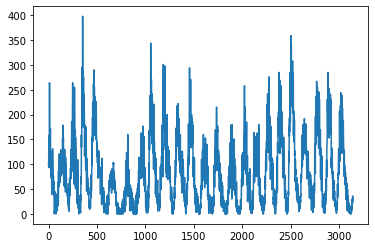

In [137]:
a['Avg_sunspot_count'].plot()

In [138]:
date=pd.date_range(start='01/01/1749',end='01/01/2011',freq='M')
date

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', length=3144, freq='M')

In [139]:
a['Time_Stamp']=pd.DataFrame(date)
a.head()

,Month,Avg_sunspot_count,Time_Stamp
0,01-01-1749,97,1749-01-31
1,02-01-1749,104,1749-02-28
2,03-01-1749,117,1749-03-31
3,04-01-1749,93,1749-04-30
4,05-01-1749,142,1749-05-31


In [140]:
a.drop('Month',inplace=True,axis=1)
a.head()

,Avg_sunspot_count,Time_Stamp
0,97,1749-01-31
1,104,1749-02-28
2,117,1749-03-31
3,93,1749-04-30
4,142,1749-05-31


In [141]:
a1=a.set_index('Time_Stamp')
a1.head()

,Avg_sunspot_count
Time_Stamp,
1749-01-31,97
1749-02-28,104
1749-03-31,117
1749-04-30,93
1749-05-31,142


In [142]:
a1.sort_index()

,Avg_sunspot_count
Time_Stamp,
1749-01-31,97
1749-02-28,104
1749-03-31,117
1749-04-30,93
1749-05-31,142
...,...
2010-08-31,30
2010-09-30,36
2010-10-31,34


In [143]:
a1.iloc[2952:3144,:].head()

,Avg_sunspot_count
Time_Stamp,
1995-01-31,33
1995-02-28,46
1995-03-31,46
1995-04-30,22
1995-05-31,19


In [144]:
a1.iloc[2952:3144,:].tail()

,Avg_sunspot_count
Time_Stamp,
2010-08-31,30
2010-09-30,36
2010-10-31,34
2010-11-30,34
2010-12-31,25


In [145]:
a1=a1.iloc[2952:3144,:]
a1.head()

,Avg_sunspot_count
Time_Stamp,
1995-01-31,33
1995-02-28,46
1995-03-31,46
1995-04-30,22
1995-05-31,19


In [146]:
a1.shape

(192, 1)

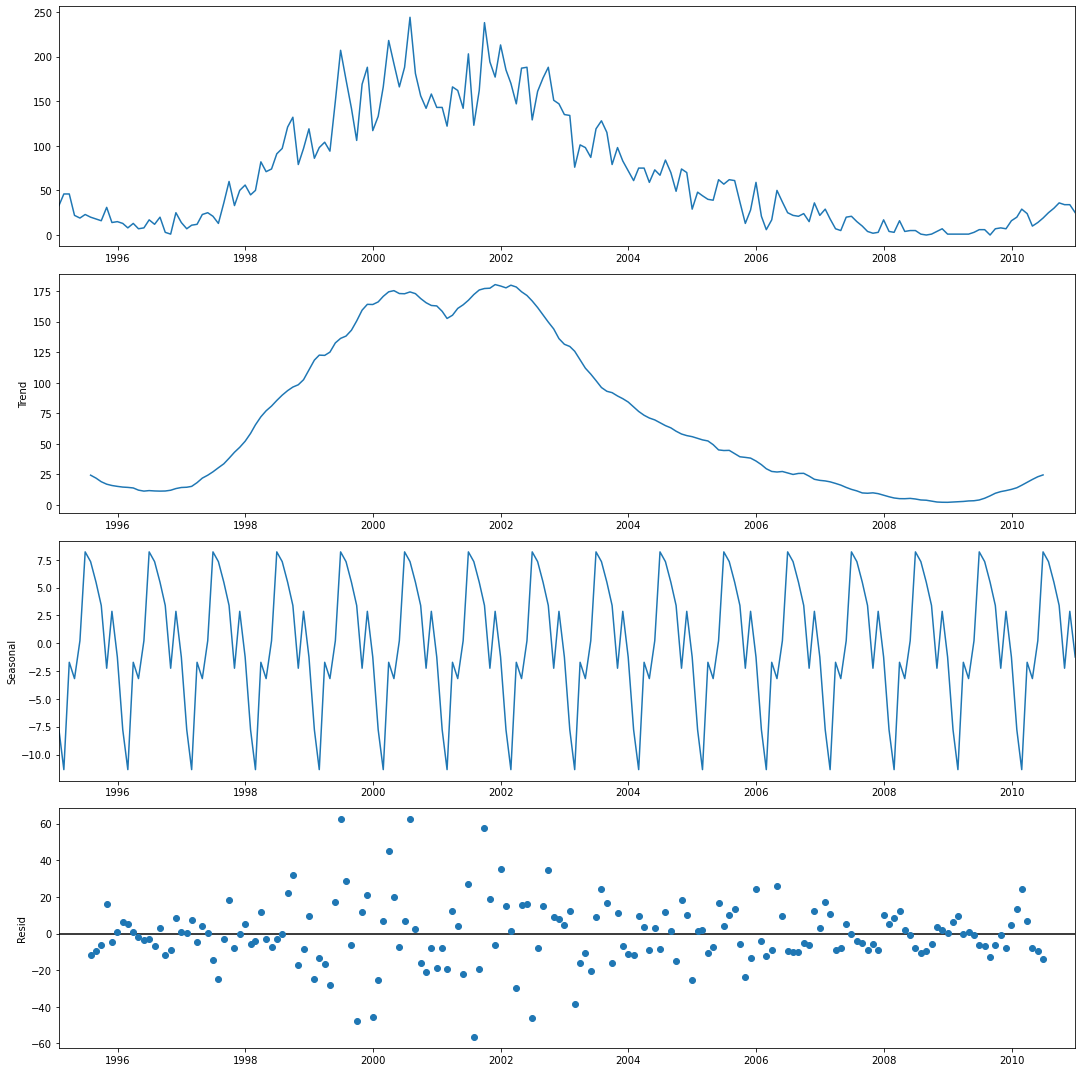

In [147]:
plt.rcParams['figure.figsize']=[15,15]
decomposition=seasonal_decompose(a1,model='additive')
decomposition.plot();


In [148]:
a1.iloc[152,:]

Avg_sunspot_count    4
Name: 2007-09-30 00:00:00, dtype: int64

In [149]:
a1.tail()

,Avg_sunspot_count
Time_Stamp,
2010-08-31,30
2010-09-30,36
2010-10-31,34
2010-11-30,34
2010-12-31,25


In [150]:
train_end=datetime(2007,9,30)
test_end=datetime(2010,12,31)

In [151]:
train= a1[:train_end] 
test = a1[train_end + timedelta(days=1):test_end]

In [152]:
print('train')
display(train.head())
print('test')
display(test.head())

train


,Avg_sunspot_count
Time_Stamp,
1995-01-31,33
1995-02-28,46
1995-03-31,46
1995-04-30,22
1995-05-31,19


test


,Avg_sunspot_count
Time_Stamp,
2007-10-31,2
2007-11-30,3
2007-12-31,17
2008-01-31,4
2008-02-29,3


# Triple Exponential Smoothing

In [153]:
model_TES_add = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='heuristic')

In [154]:
model_TES_add = model_TES_add.fit(optimized=True)
model_TES_add.summary()

Dep. Variable:,Avg_sunspot_count,No. Observations:,153
Model:,ExponentialSmoothing,SSE,76553.246
Optimized:,True,AIC,982.941
Trend:,Additive,BIC,1031.429
Seasonal:,Additive,AICC,988.046
Seasonal Periods:,12,Date:,"Fri, 17 Sep 2021"
Box-Cox:,False,Time:,09:31:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3595047,alpha,True
smoothing_trend,0.0734696,beta,True


In [155]:
TES_add_predict =  model_TES_add.forecast(len(test))

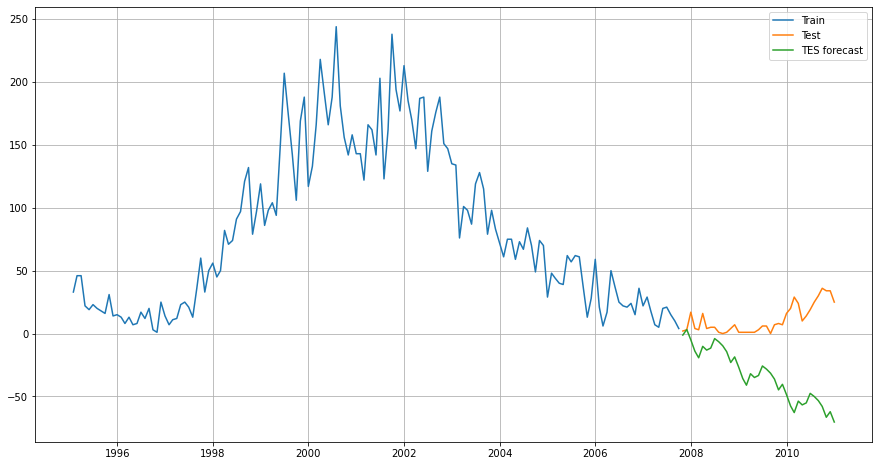

In [156]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_add_predict, label='TES forecast')
plt.legend(loc='best')
plt.grid()

In [157]:
mean_squared_error(test.values,TES_add_predict.values,squared=False)

53.17386288626107

# ARMA 

Adfuller test


In [158]:
observations= a1.values
test_result = adfuller(observations)

In [159]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -1.946707
p-value: 0.310418
Critical Values:
	1%: -3.46806
	5%: -2.87811
	10%: -2.57560


since the p-value is 0.68 that is it is greater than 0.05 the series is not stationary so we have to do differencing

In [160]:
df_diff = a1.diff(periods=2).dropna()
observations= df_diff.values
test_result = adfuller(observations)
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -3.724666
p-value: 0.003779
Critical Values:
	1%: -3.46721
	5%: -2.87773
	10%: -2.57540


since the p-value is 0 that is it is lesser than 0.05 the series is  stationary 

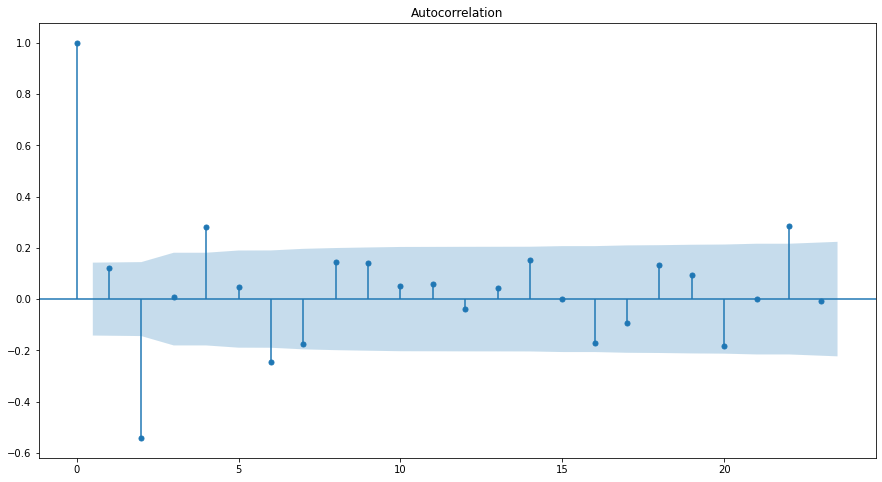

In [161]:
plt.rcParams['figure.figsize']=[15,8]
plot_acf(df_diff);

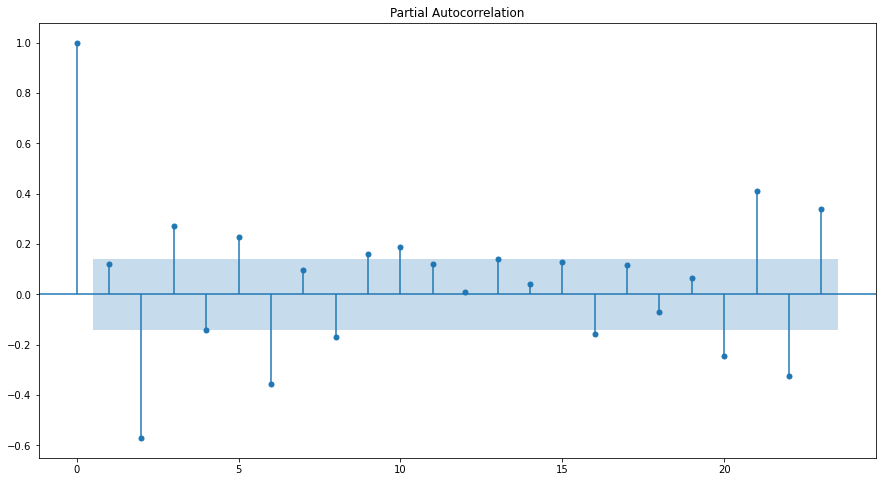

In [162]:
plt.rcParams['figure.figsize']=[15,8]
plot_pacf(df_diff);

In [163]:
model=ARMA(train,(2,2))

model_fit=model.fit()

print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:      Avg_sunspot_count   No. Observations:                  153
Model:                     ARMA(2, 2)   Log Likelihood                -693.597
Method:                       css-mle   S.D. of innovations             22.343
Date:                Fri, 17 Sep 2021   AIC                           1399.193
Time:                        09:31:30   BIC                           1417.376
Sample:                    01-31-1995   HQIC                          1406.579
                         - 09-30-2007                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      54.0445     42.861      1.261      0.207     -29.962     138.051
ar.L1.Avg_sunspot_count     0.6091      0.226      2.696      0.007       0.166       1.052


In [164]:
pred_start=test.index[0]
pred_end=test.index[-1]

pred_end

predictions=model_fit.predict(start=pred_start, end=pred_end)

predictions1=model_fit.forecast(len(test))#TES_add_predict =  model_TES_add.forecast(len(test))

predictions1

(array([10.18967114, 12.82074805, 12.66043316, 13.53913917, 14.01488435,
        14.63074521, 15.18241983, 15.74699246, 16.29560285, 16.83927664,
        17.37402008, 17.90149198, 18.42122073, 18.9335346 , 19.43845855,
        19.93612963, 20.42664053, 20.91009861, 21.38660364, 21.85625623,
        22.3191547 , 22.77539625, 23.22507661, 23.66829012, 24.10512979,
        24.53568728, 24.96005293, 25.37831579, 25.79056363, 26.19688293,
        26.59735897, 26.99207578, 27.38111617, 27.76456178, 28.14249307,
        28.51498934, 28.88212875, 29.24398834, 29.60064404]),
 array([22.3430657 , 26.76252381, 27.80964752, 29.57712442, 30.89863019,
        32.23424576, 33.44320485, 34.59060138, 35.66507386, 36.68048004,
        37.64003986, 38.5495628 , 39.41293802, 40.23395244, 41.01577768,
        41.76126832, 42.47294195, 43.15305675, 43.80363999, 44.42652377,
        45.02336994, 45.59569248, 46.14487554, 46.67218904, 47.17880167,
        47.66579213, 48.13415871, 48.58482763, 49.01866021, 49

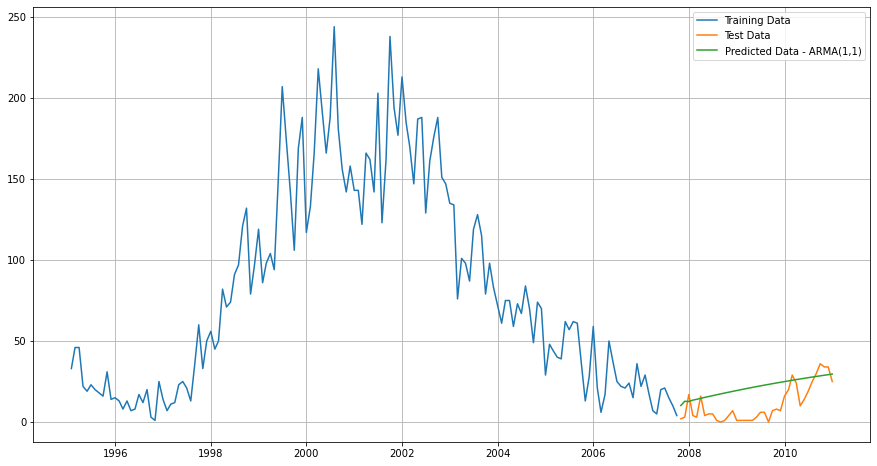

In [165]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predictions,label='Predicted Data - ARMA(1,1)')
plt.legend(loc='best')
plt.grid();

In [166]:
mean_squared_error(test.values,predictions.values,squared=False)

13.305847155907717

# ARIMA

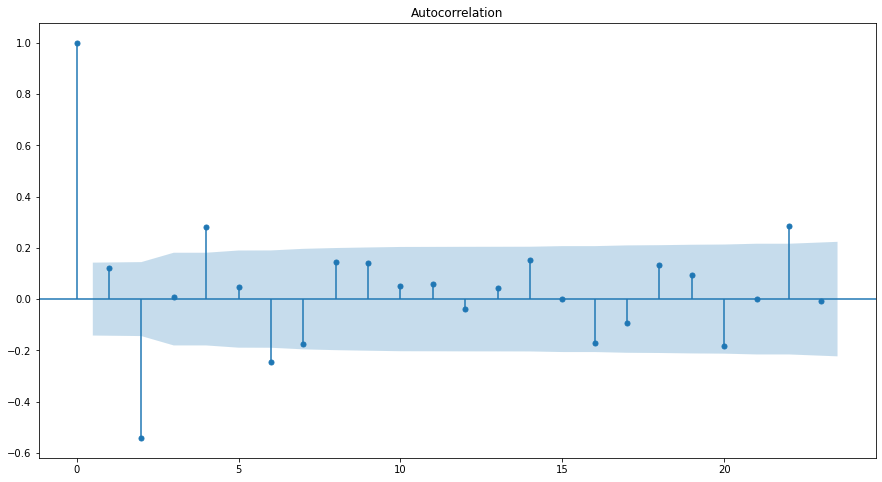

In [167]:
plt.rcParams['figure.figsize']=[15,8]
plot_acf(df_diff);

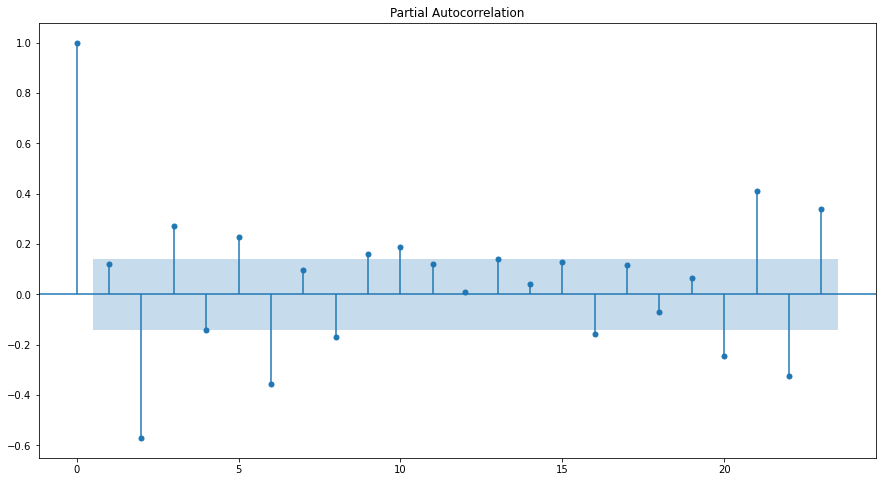

In [168]:
plt.rcParams['figure.figsize']=[15,8]
plot_pacf(df_diff);

In [169]:
import itertools
p = q = range(0, 9)
d= range(1,10)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (0, 1, 5)
Model: (0, 1, 6)
Model: (0, 1, 7)
Model: (0, 1, 8)
Model: (0, 2, 0)
Model: (0, 2, 1)
Model: (0, 2, 2)
Model: (0, 2, 3)
Model: (0, 2, 4)
Model: (0, 2, 5)
Model: (0, 2, 6)
Model: (0, 2, 7)
Model: (0, 2, 8)
Model: (0, 3, 0)
Model: (0, 3, 1)
Model: (0, 3, 2)
Model: (0, 3, 3)
Model: (0, 3, 4)
Model: (0, 3, 5)
Model: (0, 3, 6)
Model: (0, 3, 7)
Model: (0, 3, 8)
Model: (0, 4, 0)
Model: (0, 4, 1)
Model: (0, 4, 2)
Model: (0, 4, 3)
Model: (0, 4, 4)
Model: (0, 4, 5)
Model: (0, 4, 6)
Model: (0, 4, 7)
Model: (0, 4, 8)
Model: (0, 5, 0)
Model: (0, 5, 1)
Model: (0, 5, 2)
Model: (0, 5, 3)
Model: (0, 5, 4)
Model: (0, 5, 5)
Model: (0, 5, 6)
Model: (0, 5, 7)
Model: (0, 5, 8)
Model: (0, 6, 0)
Model: (0, 6, 1)
Model: (0, 6, 2)
Model: (0, 6, 3)
Model: (0, 6, 4)
Model: (0, 6, 5)
Model: (0, 6, 6)
Model: (0, 6, 7)
Model: (0, 6, 8)
Model: (0, 7, 0)
Model: (0, 7, 1)
Model: (0, 7, 2)
Model: (0, 

In [103]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [104]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 1, 0) - AIC:1419.1253038085656
ARIMA(0, 1, 1) - AIC:1396.9275665922669
ARIMA(0, 1, 2) - AIC:1388.9356934903883
ARIMA(0, 1, 3) - AIC:1384.689963513145
ARIMA(0, 1, 4) - AIC:1386.5559406688396
ARIMA(0, 1, 5) - AIC:1381.9858169619836
ARIMA(0, 1, 6) - AIC:1383.6557314309212
ARIMA(0, 1, 7) - AIC:1385.2443353926167
ARIMA(0, 1, 8) - AIC:1377.048595032085
ARIMA(0, 2, 0) - AIC:1544.7885505999727
ARIMA(0, 2, 1) - AIC:1417.3412285091645
ARIMA(0, 2, 2) - AIC:1394.7820850843532
ARIMA(0, 2, 3) - AIC:1382.6615657452767
ARIMA(0, 2, 4) - AIC:1382.6560253163275
ARIMA(0, 2, 5) - AIC:1384.6494446669533
ARIMA(0, 2, 6) - AIC:1376.7466291663427
ARIMA(0, 2, 7) - AIC:1377.359667165258
ARIMA(1, 1, 0) - AIC:1413.9423306180586
ARIMA(1, 1, 1) - AIC:1395.2142669020257
ARIMA(1, 1, 2) - AIC:1387.5516800180872
ARIMA(1, 1, 3) - AIC:1386.636192488941
ARIMA(1, 1, 4) - AIC:1387.8584598771083
ARIMA(1, 1, 5) - AIC:1383.7950782668918
ARIMA(1, 1, 6) - AIC:1385.6416883015274
ARIMA(1, 1, 7) - AIC:1380.4921307606166
ARIM

In [105]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
108,"(8, 2, 3)",1371.367418
95,"(7, 2, 2)",1376.538406
15,"(0, 2, 6)",1376.746629
8,"(0, 1, 8)",1377.048595
16,"(0, 2, 7)",1377.359667
...,...,...
0,"(0, 1, 0)",1419.125304
44,"(3, 2, 0)",1431.627421
35,"(2, 2, 0)",1460.111008
26,"(1, 2, 0)",1515.927161


In [170]:
model = ARIMA(train, order=(8,2,3),freq='M')

results_Arima = model.fit()

print(results_Arima.summary())

                              ARIMA Model Results                               
Dep. Variable:     D2.Avg_sunspot_count   No. Observations:                  151
Model:                   ARIMA(8, 2, 3)   Log Likelihood                -672.684
Method:                         css-mle   S.D. of innovations             20.222
Date:                  Fri, 17 Sep 2021   AIC                           1371.367
Time:                          09:31:48   BIC                           1410.592
Sample:                      03-31-1995   HQIC                          1387.303
                           - 09-30-2007                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0319      0.020     -1.574      0.116      -0.072       0.008
ar.L1.D2.Avg_sunspot_count    -2.0746      0.113    -18.417      0.

In [171]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [172]:
ARIMA_predictions=results_Arima.predict(start=pred_start, end=pred_end)

In [173]:
ARIMA_predictions

2007-10-31     8.459725
2007-11-30   -10.020085
2007-12-31     8.553736
2008-01-31    -9.903240
2008-02-29    15.121312
2008-03-31   -16.936998
2008-04-30    14.163671
2008-05-31   -11.958039
2008-06-30    10.421933
2008-07-31    -7.330677
2008-08-31     2.920591
2008-09-30     0.143049
2008-10-31    -2.322700
2008-11-30     5.045344
2008-12-31    -8.285462
2009-01-31    10.455807
2009-02-28   -11.773674
2009-03-31    12.603868
2009-04-30   -12.943591
2009-05-31    12.004839
2009-06-30   -10.322226
2009-07-31     8.203314
2009-08-31    -5.931857
2009-09-30     3.111014
2009-10-31    -0.232912
2009-11-30    -2.619276
2009-12-31     5.118928
2010-01-31    -7.499827
2010-02-28     9.297677
2010-03-31   -10.562310
2010-04-30    11.025607
2010-05-31   -10.993625
2010-06-30    10.201292
2010-07-31    -8.923212
2010-08-31     7.026618
2010-09-30    -4.911706
2010-10-31     2.432058
2010-11-30     0.034546
2010-12-31    -2.576920
Freq: M, dtype: float64

In [174]:
ARIMA_pred=ARIMA_predictions.cumsum()
ARIMA_pred

2007-10-31     8.459725
2007-11-30    -1.560361
2007-12-31     6.993375
2008-01-31    -2.909865
2008-02-29    12.211447
2008-03-31    -4.725551
2008-04-30     9.438120
2008-05-31    -2.519919
2008-06-30     7.902014
2008-07-31     0.571336
2008-08-31     3.491927
2008-09-30     3.634976
2008-10-31     1.312276
2008-11-30     6.357620
2008-12-31    -1.927842
2009-01-31     8.527966
2009-02-28    -3.245708
2009-03-31     9.358159
2009-04-30    -3.585432
2009-05-31     8.419407
2009-06-30    -1.902819
2009-07-31     6.300496
2009-08-31     0.368638
2009-09-30     3.479653
2009-10-31     3.246741
2009-11-30     0.627464
2009-12-31     5.746393
2010-01-31    -1.753435
2010-02-28     7.544242
2010-03-31    -3.018067
2010-04-30     8.007539
2010-05-31    -2.986086
2010-06-30     7.215206
2010-07-31    -1.708006
2010-08-31     5.318611
2010-09-30     0.406906
2010-10-31     2.838963
2010-11-30     2.873509
2010-12-31     0.296589
Freq: M, dtype: float64

In [175]:
ARIMA_pred=pd.DataFrame(ARIMA_pred,columns=train.columns)

In [176]:
predict_fc = ARIMA_pred.copy()
columns = train.columns
for col in columns:        
        predict_fc[str(col)+'_forecast'] = train[col].iloc[-1] + predict_fc[str(col)]

In [177]:
predict_fc.head()

,Avg_sunspot_count,Avg_sunspot_count_forecast
2007-10-31,8.459725,12.459725
2007-11-30,-1.560361,2.439639
2007-12-31,6.993375,10.993375
2008-01-31,-2.909865,1.090135
2008-02-29,12.211447,16.211447


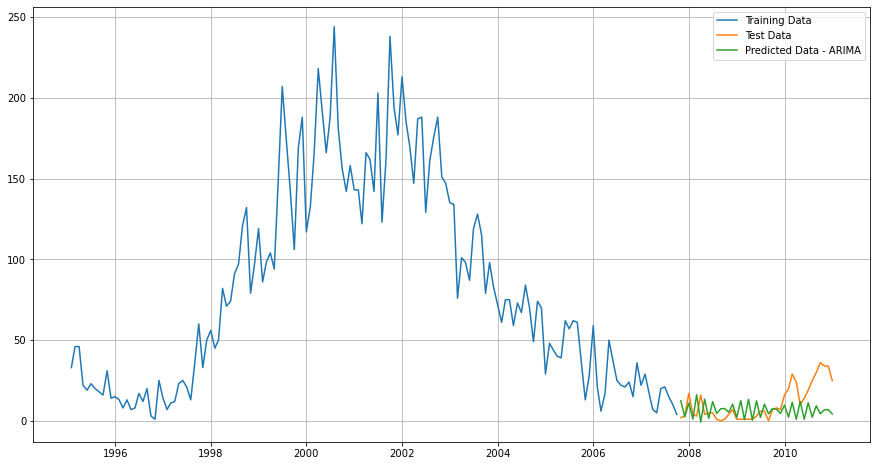

In [178]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predict_fc['Avg_sunspot_count_forecast'],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [179]:
test.head()

,Avg_sunspot_count
Time_Stamp,
2007-10-31,2
2007-11-30,3
2007-12-31,17
2008-01-31,4
2008-02-29,3


In [180]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],predict_fc['Avg_sunspot_count_forecast'], squared=False)
print(rmse)

12.993577967203516


# result 2

In [165]:
train= a1
test = pd.read_csv('test_(2).csv')

In [166]:
model = ARIMA(train, order=(8,2,3))

results_Arima = model.fit()

print(results_Arima.summary())

                              ARIMA Model Results                               
Dep. Variable:     D2.Avg_sunspot_count   No. Observations:                  190
Model:                   ARIMA(8, 2, 3)   Log Likelihood                -827.867
Method:                         css-mle   S.D. of innovations             18.464
Date:                  Fri, 17 Sep 2021   AIC                           1681.735
Time:                          08:41:24   BIC                           1723.946
Sample:                      03-31-1995   HQIC                          1698.834
                           - 12-31-2010                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0117      0.013     -0.872      0.383      -0.038       0.015
ar.L1.D2.Avg_sunspot_count    -2.0278      0.106    -19.043      0.

In [81]:
test.head()

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [82]:
pred_start=test.iloc[0,0]
pred_end=test.iloc[-1,0]

In [83]:
ARIMA_predictions=results_Arima.predict(start=pred_start, end=pred_end)

In [84]:
ARIMA_predictions

2011-01-31    9.986820
2011-02-28   -0.126576
2011-03-31   -3.604039
2011-04-30    0.199495
2011-05-31    2.490569
                ...   
2020-08-31    0.435467
2020-09-30   -0.493662
2020-10-31    0.476881
2020-11-30   -0.479087
2020-12-31    0.408950
Freq: M, Length: 120, dtype: float64

In [85]:
ARIMA_pred=ARIMA_predictions.cumsum()
ARIMA_pred

2011-01-31    9.986820
2011-02-28    9.860244
2011-03-31    6.256205
2011-04-30    6.455699
2011-05-31    8.946268
                ...   
2020-08-31    6.732764
2020-09-30    6.239102
2020-10-31    6.715983
2020-11-30    6.236896
2020-12-31    6.645846
Freq: M, Length: 120, dtype: float64

In [86]:
ARIMA_pred=pd.DataFrame(ARIMA_pred,columns=train.columns)

In [87]:
predict_fc = ARIMA_pred.copy()
columns = train.columns
for col in columns:        
        predict_fc[str(col)+'_forecast'] = train[col].iloc[-1] + predict_fc[str(col)]

In [88]:
predict_fc.head()

,Avg_sunspot_count,Avg_sunspot_count_forecast
2011-01-31,9.986820,34.986820
2011-02-28,9.860244,34.860244
2011-03-31,6.256205,31.256205
2011-04-30,6.455699,31.455699
2011-05-31,8.946268,33.946268


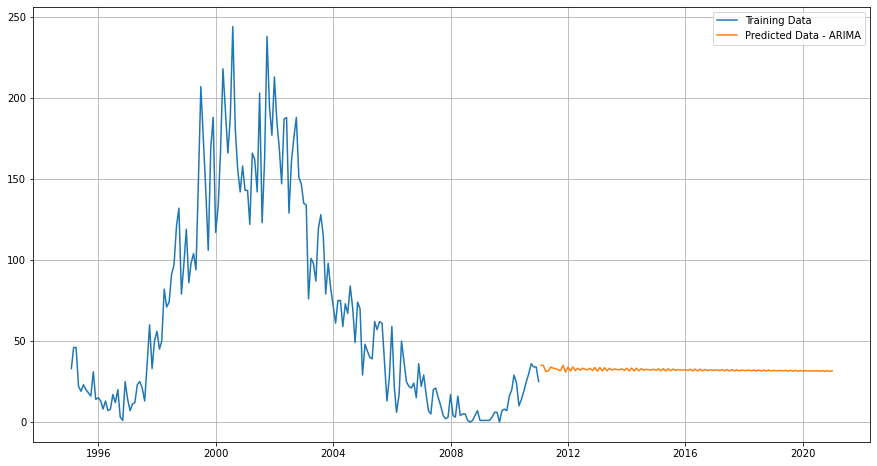

In [89]:
plt.plot(train,label='Training Data')
#plt.plot(test,label='Test Data')
plt.plot(predict_fc['Avg_sunspot_count_forecast'],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [90]:
test.head()

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [91]:
result=test.copy()

In [92]:
predict_fc.head()

,Avg_sunspot_count,Avg_sunspot_count_forecast
2011-01-31,9.986820,34.986820
2011-02-28,9.860244,34.860244
2011-03-31,6.256205,31.256205
2011-04-30,6.455699,31.455699
2011-05-31,8.946268,33.946268


In [93]:
a=list(predict_fc['Avg_sunspot_count_forecast'])

In [94]:
result['Avg_sunspot_count']=pd.DataFrame(a)
result.head()

,Month,Avg_sunspot_count
0,01-01-2011,34.986820
1,02-01-2011,34.860244
2,03-01-2011,31.256205
3,04-01-2011,31.455699
4,05-01-2011,33.946268


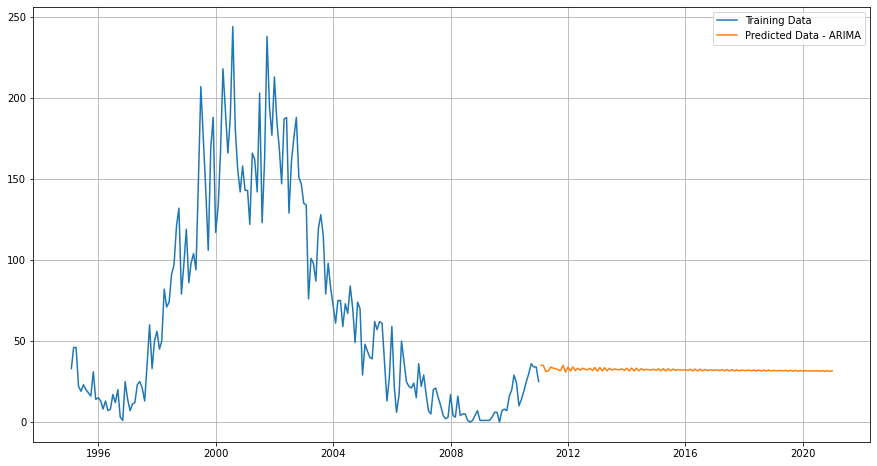

In [95]:
plt.plot(train,label='Training Data')
#plt.plot(test,label='Test Data')
plt.plot(predict_fc['Avg_sunspot_count_forecast'],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [96]:
result.to_csv('result25.csv', header=True, index=False)#not final result 

# Sarimax

In [118]:
import itertools
p = q = range(0, 6)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 1)(0, 1, 2, 12)
Model: (0, 1, 2)(0, 1, 3, 12)
Model: (0, 1, 2)(0, 1, 4, 12)


In [119]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5)]

In [120]:
model_pdq

[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (0, 1, 4, 12),
 (0, 1, 5, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (1, 1, 4, 12),
 (1, 1, 5, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (2, 1, 4, 12),
 (2, 1, 5, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12),
 (3, 1, 4, 12),
 (3, 1, 5, 12),
 (4, 1, 0, 12),
 (4, 1, 1, 12),
 (4, 1, 2, 12),
 (4, 1, 3, 12),
 (4, 1, 4, 12),
 (4, 1, 5, 12),
 (5, 1, 0, 12),
 (5, 1, 1, 12),
 (5, 1, 2, 12),
 (5, 1, 3, 12),
 (5, 1, 4, 12),
 (5, 1, 5, 12)]

In [121]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [122]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = SARIMAX(train,
                      order=param,
                      seasonal_order=param_seasonal,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1421.3733612343854
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1221.6987863180584
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1113.006641423068
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:4112.505708931099
SARIMA(0, 1, 0)x(0, 1, 4, 12)12 - AIC:884.0793623639097
SARIMA(0, 1, 0)x(0, 1, 5, 12)12 - AIC:777.991606412811
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1280.1419203106107
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1223.441876457295
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1114.5378145539978


KeyboardInterrupt: 

In [60]:
dfObj2.sort_values(by=['AIC']).head(200)

,param,seasonal,AIC
27,"(0, 1, 0)","(4, 1, 3, 12)",186.156546
29,"(0, 1, 0)","(4, 1, 5, 12)",740.745133
17,"(0, 1, 0)","(2, 1, 5, 12)",748.841424
23,"(0, 1, 0)","(3, 1, 5, 12)",749.273907
32,"(0, 1, 0)","(5, 1, 2, 12)",758.063053
31,"(0, 1, 0)","(5, 1, 1, 12)",760.942322
30,"(0, 1, 0)","(5, 1, 0, 12)",763.918340
5,"(0, 1, 0)","(0, 1, 5, 12)",777.991606
11,"(0, 1, 0)","(1, 1, 5, 12)",778.416323
22,"(0, 1, 0)","(3, 1, 4, 12)",861.899913


In [181]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(0,1,1),
                                seasonal_order=(4,1,6,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                              SARIMAX Results                                              
Dep. Variable:                                   Avg_sunspot_count   No. Observations:                  153
Model:             SARIMAX(0, 1, 1)x(4, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood                -287.222
Date:                                             Fri, 17 Sep 2021   AIC                            598.444
Time:                                                     09:32:19   BIC                            624.720
Sample:                                                 01-31-1995   HQIC                           608.827
                                                      - 09-30-2007                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [182]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [183]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

In [184]:
SARIMA_predictions

2007-10-31    -6.387446
2007-11-30     4.778927
2007-12-31    -3.022044
2008-01-31   -13.630352
2008-02-29   -15.643083
2008-03-31     2.411519
2008-04-30    -1.647427
2008-05-31     7.949353
2008-06-30    32.231320
2008-07-31    24.339623
2008-08-31     9.708758
2008-09-30    -2.216750
2008-10-31     2.179752
2008-11-30    13.403066
2008-12-31    -0.679990
2009-01-31    -6.177795
2009-02-28    -1.144051
2009-03-31     4.013142
2009-04-30     8.184689
2009-05-31    12.229168
2009-06-30     9.701795
2009-07-31    19.497095
2009-08-31     5.491182
2009-09-30    -2.175425
2009-10-31    -8.549289
2009-11-30     4.312993
2009-12-31   -13.706860
2010-01-31   -13.204448
2010-02-28   -24.453922
2010-03-31   -13.521857
2010-04-30   -11.551767
2010-05-31   -11.278743
2010-06-30    -0.538830
2010-07-31    -1.742285
2010-08-31    -3.742399
2010-09-30    -7.301942
2010-10-31   -17.575477
2010-11-30   -10.364501
2010-12-31   -15.355356
Freq: M, Name: predicted_mean, dtype: float64

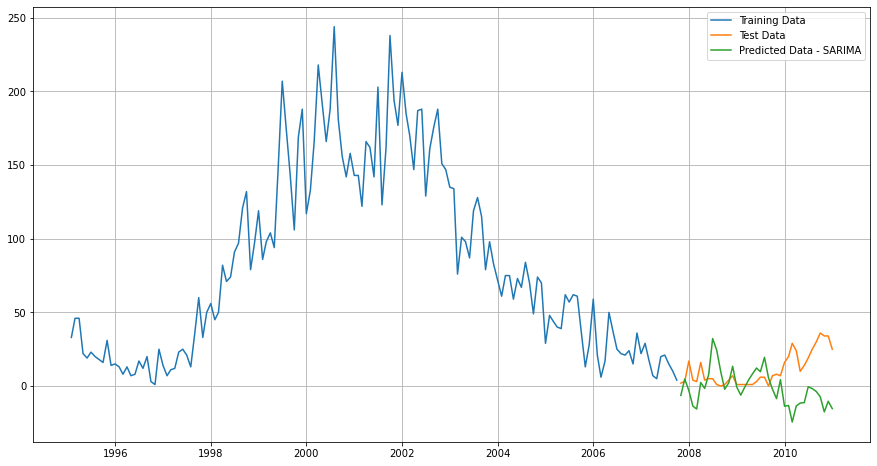

In [185]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [186]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test,SARIMA_predictions, squared=False)
print(rmse)

23.375649345527673


In [187]:
a1.mean()

Avg_sunspot_count    67.505208
dtype: float64

In [188]:
train= a1
test = pd.read_csv('test_(2).csv')

In [189]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(0,1,1),
                                seasonal_order=(4,1,6,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                              SARIMAX Results                                              
Dep. Variable:                                   Avg_sunspot_count   No. Observations:                  192
Model:             SARIMAX(0, 1, 1)x(4, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood                -438.288
Date:                                             Fri, 17 Sep 2021   AIC                            900.577
Time:                                                     09:32:36   BIC                            932.424
Sample:                                                 01-31-1995   HQIC                           913.482
                                                      - 12-31-2010                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [190]:
test.head()

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [191]:
pred_start=test.iloc[0,0]
pred_end=test.iloc[-1,0]

In [192]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

In [193]:
SARIMA_predictions

2011-01-31    22.913742
2011-02-28    23.401521
2011-03-31    30.450548
2011-04-30    22.668783
2011-05-31    32.064203
                ...    
2020-08-31    48.528438
2020-09-30    44.369560
2020-10-31    41.475062
2020-11-30    46.641393
2020-12-31    40.120995
Freq: M, Name: predicted_mean, Length: 120, dtype: float64

In [194]:
SARIMA_predictions.values

array([22.91374191, 23.4015212 , 30.45054785, 22.66878254, 32.064203  ,
       42.4110967 , 40.69364352, 40.06654701, 39.23590043, 36.71376065,
       39.13688806, 37.07112024, 31.39367746, 35.14730138, 43.29187109,
       38.26978753, 45.28933534, 55.5445753 , 58.9882766 , 51.86034657,
       46.86203059, 44.79145737, 51.58889106, 42.61841983, 38.46479174,
       38.16927355, 43.30413985, 44.36442175, 49.6304498 , 54.61874936,
       59.27295215, 51.11136529, 44.53780034, 43.0274086 , 49.99586838,
       39.21285749, 36.7949002 , 33.20003328, 41.83099506, 39.16813466,
       41.91982261, 46.642056  , 51.24278071, 47.24382478, 41.76634271,
       36.78184771, 41.69394302, 35.5898533 , 29.65587341, 26.58694429,
       36.7115997 , 33.1202338 , 38.30377351, 46.40569666, 45.70233308,
       43.95976974, 41.36201139, 37.85898791, 41.98072439, 37.07823491,
       32.07572838, 32.74319203, 40.63068504, 36.43273585, 43.30551179,
       51.98965162, 54.27273264, 48.92041023, 44.37843151, 41.70

In [195]:
test.head()

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [196]:
result=test.copy()

In [197]:
a=SARIMA_predictions.values

In [198]:
result['Avg_sunspot_count']=pd.DataFrame(a)
result.head()

,Month,Avg_sunspot_count
0,01-01-2011,22.913742
1,02-01-2011,23.401521
2,03-01-2011,30.450548
3,04-01-2011,22.668783
4,05-01-2011,32.064203


In [199]:
result.to_csv('result32.csv', header=True, index=False)